## Data Pre-Processing 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
header = ['l1', 'l2', 'l3', 'l4', 'l5', 'r1', 'r2', 'r3', 'r4', 'r5', 'l_ax', 'l_ay', 'l_az', 'l_gx', 'l_gy', 'l_gz']

In [28]:
path = "./final_v1.csv"
df = pd.read_csv(path)

df.head()

,l1,l2,l3,l4,l5,r1,r2,r3,r4,r5,l_ax,l_ay,l_az,l_gx,l_gy,l_gz,label
0,3008,2923,1661,2841,0,0,0,0,0,0,8.377312,-3.088520,6.890512,-0.085801,-0.017853,-0.046897,a
1,3015,2882,1664,2837,0,0,0,0,0,0,8.566454,-3.023877,6.562507,-0.087400,-0.005596,-0.051960,a
2,3024,2906,1654,2835,0,0,0,0,0,0,8.463503,-3.009511,6.694188,-0.102588,0.006662,-0.049562,a
3,3027,2903,1651,2848,0,0,0,0,0,0,8.760384,-2.664747,6.344635,-0.100723,-0.009593,-0.056224,a
4,3023,2901,1663,2834,0,0,0,0,0,0,8.604761,-2.844312,6.550536,-0.100723,0.001599,-0.031176,a


In [30]:
df['label'].value_counts()

label
x           30
i love u    26
g           26
l           26
f           25
h           25
v           23
u           23
m           23
s           23
r           23
p           23
q           22
y           22
w           22
t           22
n           22
o           22
b           22
e           22
k           21
i           21
d           20
ch          20
c           20
a           20
Name: count, dtype: int64

## Model Training

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [39]:
y = df['label']
X = df.drop(columns=['label'])

X = pd.get_dummies(X)
X = X.fillna(X.mean())

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
rf_model_v1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_model_v1.predict(X_test)
y_pred

array(['b', 'n', 'h', 'i', 'p', 'l', 'u', 'y', 'c', 'h', 'f', 'b', 'p',
       'q', 'd', 'o', 'w', 's', 'd', 'k', 't', 'v', 'ch', 'c', 'm',
       'i love u', 't', 'k', 'p', 'a', 'y', 'y', 'ch', 'p', 'n', 'e',
       'ch', 't', 'g', 'l', 'i', 'n', 'ch', 'x', 'q', 't', 'ch', 'h', 'y',
       'q', 'x', 'i love u', 'a', 't', 'd', 'h', 'x', 'a', 'w', 'ch',
       'i love u', 'h', 'ch', 'm', 'm', 'q', 'f', 'y', 'x', 'e', 'v', 'o',
       'v', 'x', 'ch', 'b', 'e', 'y', 'l', 'l', 'n', 'p', 'c', 'w', 'y',
       'm', 'u', 'a', 'p', 'd', 'd', 'i', 'g', 'x', 'ch', 'q', 'w', 'm',
       'h', 'f', 'n', 'p', 'g', 'n', 'l', 'h', 'x', 'i', 'y', 'a', 'h',
       'h', 'u', 'q', 'i love u', 'k', 'd', 'f', 'r'], dtype=object)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9748


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00         5
           b       1.00      1.00      1.00         3
           c       0.67      1.00      0.80         2
          ch       1.00      1.00      1.00         9
           d       1.00      1.00      1.00         6
           e       1.00      1.00      1.00         3
           f       1.00      1.00      1.00         4
           g       1.00      1.00      1.00         3
           h       1.00      1.00      1.00         9
           i       1.00      0.80      0.89         5
    i love u       1.00      0.80      0.89         5
           k       1.00      1.00      1.00         3
           l       0.80      1.00      0.89         4
           m       1.00      1.00      1.00         5
           n       0.83      1.00      0.91         5
           o       1.00      1.00      1.00         2
           p       1.00      1.00      1.00         7
           q       1.00    

In [67]:
rf_model_v1.feature_importances_

array([0.11841094, 0.13527393, 0.11309313, 0.13263142, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15212632, 0.1550831 , 0.12961671, 0.02354936, 0.01560881,
       0.02460628])

In [69]:
rf_model_v1.feature_names_in_

array(['l1', 'l2', 'l3', 'l4', 'l5', 'r1', 'r2', 'r3', 'r4', 'r5', 'l_ax',
       'l_ay', 'l_az', 'l_gx', 'l_gy', 'l_gz'], dtype=object)

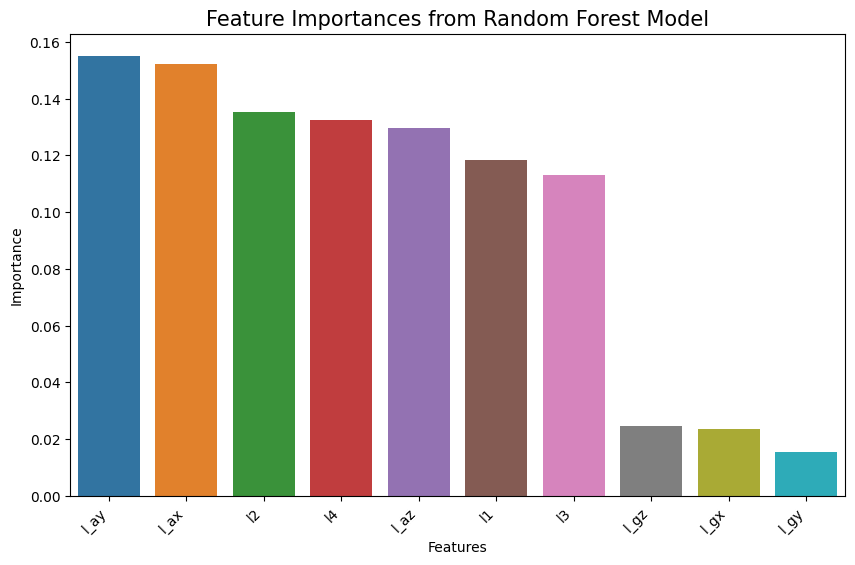

In [77]:
feature_importance_df = pd.DataFrame({
    'Feature': rf_model_v1.feature_names_in_,
    'Importance': rf_model_v1.feature_importances_
})

feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'])

plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from Random Forest Model", fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.show()

In [81]:
import pickle

with open("rf_model_v1.pkl", "wb") as file:
    pickle.dump(rf_model_v1, file)

print("Model saved successfully!")

Model saved successfully!


In [85]:
import pickle

with open("rf_model_v1.pkl", "rb") as file:
    model_v1 = pickle.load(file)

print(model_v1)

RandomForestClassifier(random_state=42)


### Model Implementation for Edge Devices (Pending)

In [89]:
!pip install tensorflow

In [99]:
import math
import tensorflow as tf
from tensorflow.keras import layers

In [101]:
def get_model():
    SAMPLES = 1000
    np.random.seed(1337)
    x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

    np.random.shuffle(x_values)
    y_values = np.sin(x_values)
    y_values += 0.1 * np.random.randn(*y_values.shape)

    TRAIN_SPLIT =  int(0.6 * SAMPLES)
    TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
    x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
    y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(x_train, y_train, epochs=100, batch_size=16,
                        validation_data=(x_validate, y_validate))
    return model

In [103]:
model = get_model()
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open("sine_model_quantized.tflite", "wb").write(tflite_model)

C:\Users\Danish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4047 - mae: 0.5495 - val_loss: 0.3856 - val_mae: 0.5332
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2990 - mae: 0.4763 - val_loss: 0.3117 - val_mae: 0.4875
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2379 - mae: 0.4206 - val_loss: 0.2593 - val_mae: 0.4479
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2179 - mae: 0.4106 - val_loss: 0.2447 - val_mae: 0.4378
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2001 - mae: 0.3917 - val_loss: 0.2061 - val_mae: 0.4017
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1781 - mae: 0.3679 - val_loss: 0.1796 - val_mae: 0.3719
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1645 - mae: 0.3471 - val_loss: 0.1664 - val_mae: 0.3541
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1566 - mae: 0.3380 - val_loss: 0.1689 - val_mae: 0.3561
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1

INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmpz71ir2ae\assets


INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmpz71ir2ae\assets


Saved artifact at 'C:\Users\Danish\AppData\Local\Temp\tmpz71ir2ae'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1664739968016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664739968784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664739969168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664739969360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664739969552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664739968592: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

In [104]:
!pip install tinymlgen

In [105]:
from tinymlgen import port

model = get_model()
c_code = port(model, pretty_print=True)
print(c_code)

Epoch 1/100


C:\Users\Danish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.7359 - mae: 0.7569 - val_loss: 0.4957 - val_mae: 0.6111
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3942 - mae: 0.5403 - val_loss: 0.4334 - val_mae: 0.5662
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3606 - mae: 0.5172 - val_loss: 0.4010 - val_mae: 0.5646
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3124 - mae: 0.4860 - val_loss: 0.3303 - val_mae: 0.4968
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2580 - mae: 0.4405 - val_loss: 0.2912 - val_mae: 0.4759
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2441 - mae: 0.4292 - val_loss: 0.2705 - val_mae: 0.4635
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2181 - mae: 0.4112 - val_loss: 0.2253 - val_mae: 0.4155
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2116 - mae: 0.4057 - val_loss: 0.2049 - val_mae: 0.3968
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1811 - mae:

INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmpqgw064t_\assets


INFO:tensorflow:Assets written to: C:\Users\Danish\AppData\Local\Temp\tmpqgw064t_\assets


Saved artifact at 'C:\Users\Danish\AppData\Local\Temp\tmpqgw064t_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1664733842128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664733841936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664733847696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664733845392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664733849616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1664733846928: TensorSpec(shape=(), dtype=tf.resource, name=None)



#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char model_data[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 
	0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 
	0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x14, 0x07, 0x00, 0x00, 
	0x24, 0x07, 0x00, 0x00, 0x08, 0x0c, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 
	0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00, 
	0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 
	0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67,